This micro project of exploratory data analysis of Amazon Top 50 Bestselling Books 2009 - 2019 dataset. 
Source of dataset = https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

books = pd.read_csv('bestsellers with categories.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [2]:
books.shape

(550, 7)

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Based on that information we get to know that there's 550 list of books with 7 columns consist of:
1. Name : Title of the book
2. Author
3. Average User Rating
4. Numbers of reviews written
5. Price
6. Year
7. Genre : Non-Fiction and Fiction

Check if theres NaN values from dataset:

In [3]:
books.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

There's no NaN values in dataset

In [43]:
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


📊**[Data Visualization]**📊

📈**Distribution**📉

Distribution of numerical value columns in dataset

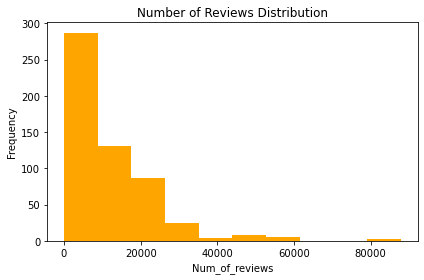

In [51]:
plt.figure()
plt.hist(x='Reviews', data=books, color='orange')
plt.title('Number of Reviews Distribution')
plt.xlabel('Num_of_reviews')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

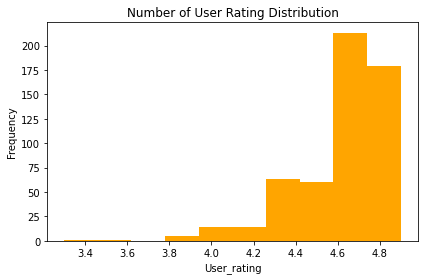

In [53]:
plt.figure()
plt.hist(x='User Rating', data=books, color='orange')
plt.title('Number of User Rating Distribution')
plt.xlabel('User_rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

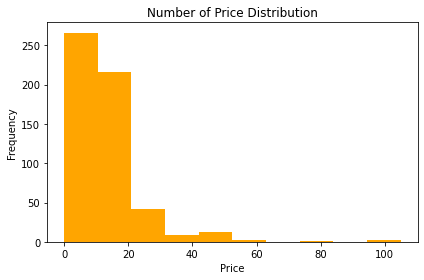

In [54]:
plt.figure()
plt.hist(x='Price', data=books, color='orange')
plt.title('Number of Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The price of bestselling books are in range of $0-20 and rarely more than 30. The ratings given are mostly higher or equal to 4.7 with the number of reviews written mostly in range of 0-20.000 reviews.

Therefore, we're going to see the correlation between price and reviews given to see if the lower number of price will lead to higher popularity, as well as price to user ratings to see if lower price lead to higher ratings.

Summary:
1. Most Books are lower price
2. Ratings are relatively high
3. Number of reviews written are in lower range 

📈**[Correlation Matrix]**📉

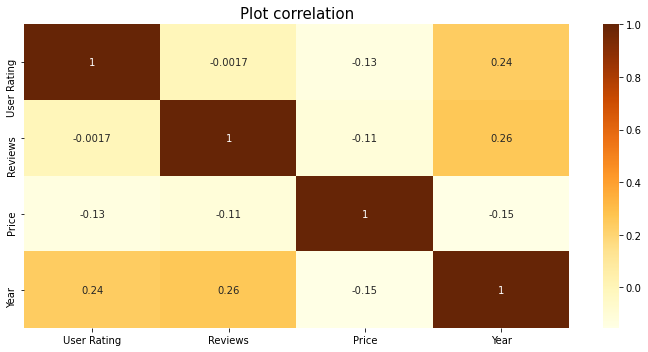

In [57]:
plt.figure(figsize=(10,5))
sns.heatmap(books.corr(), annot=True, cmap='YlOrBr')
plt.title('Plot correlation', size=15)
plt.tight_layout()
plt.show()


📈**[Scatter Plot]**📉 : Price to Number of Reviews

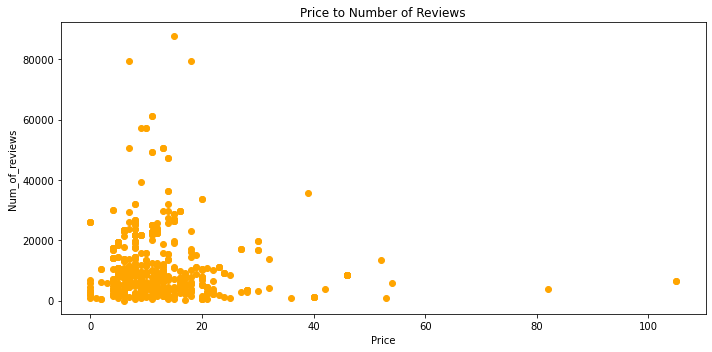

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(x='Price', y='Reviews', data=books, color='orange')
plt.title('Price to Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Num_of_reviews')
plt.tight_layout()
plt.show()

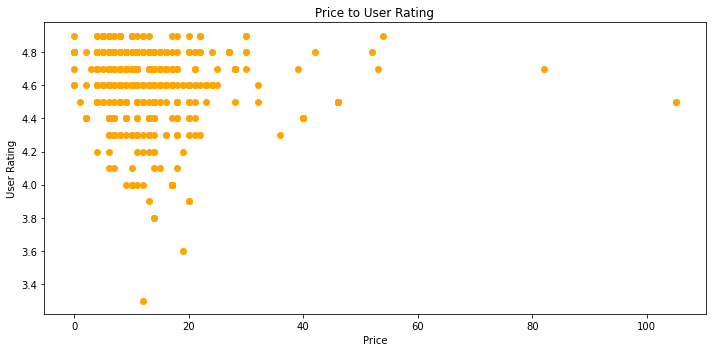

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(x='Price', y='User Rating', data=books, color='orange')
plt.title('Price to User Rating')
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.tight_layout()
plt.show()

From the number of correlation and scatter plot, the relation between price and rating or reviews are relatively low to no correlation. (0.0 - 0.5)

📈**[Genre Analysis]**📉

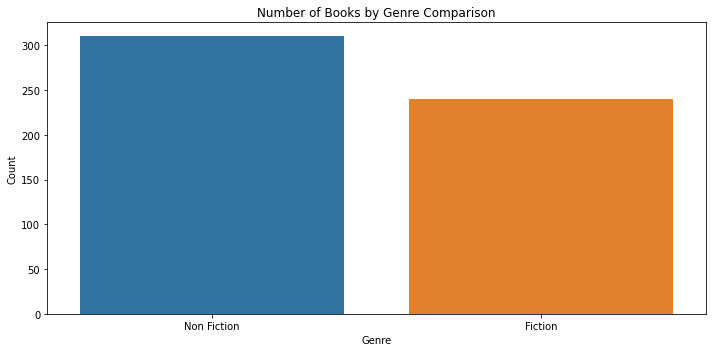

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(x='Genre', data=books)
plt.title('Number of Books by Genre Comparison')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Number of Books per Year**

<Figure size 720x360 with 0 Axes>

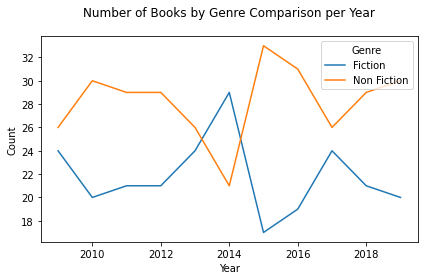

In [82]:
plt.figure(figsize=(10,5))
books.groupby(['Year', 'Genre'])['Genre'].count().unstack().plot()
plt.title('Number of Books by Genre Comparison per Year', pad=20)
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Number of Non Fiction books overall are higher than fiction. Dividing the numbers by year, we can see that in 2014 Fiction books are higher than NonFictions.

**Average Price per Year**

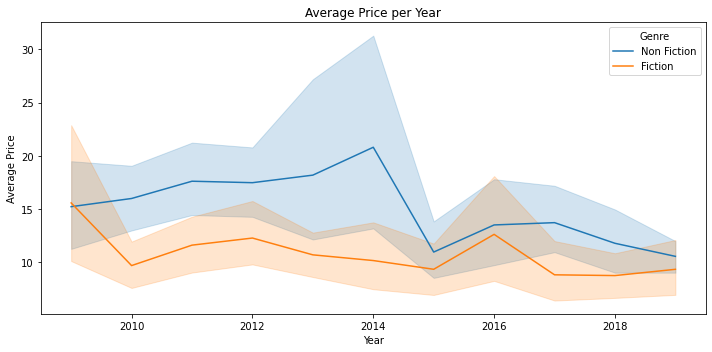

In [50]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Price', hue='Genre', data=books)
plt.title('Average Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

**Average Reviews per Year**

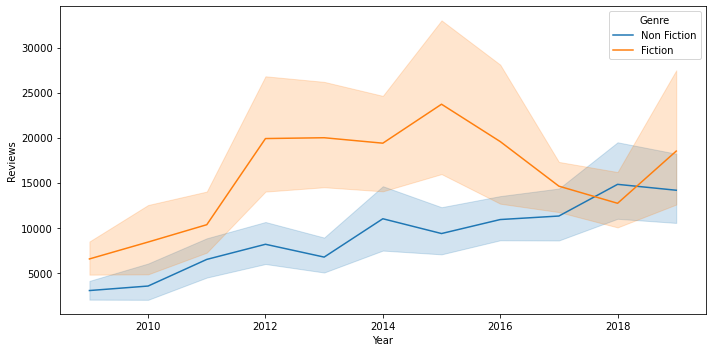

In [56]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Reviews', hue='Genre', data=books)
plt.xlabel('Year')
plt.ylabel('Reviews')
plt.tight_layout()
plt.show()

**Average User Rating per Year**

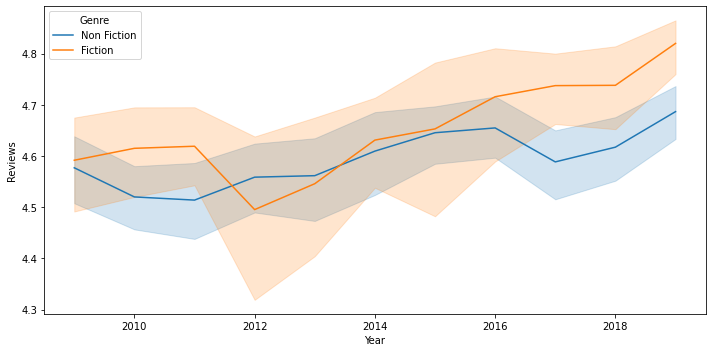

In [57]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='User Rating', hue='Genre', data=books)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend(loc='')
plt.show()

While the number of bestseller in Fiction are lower than Non Fiction, the price of the books seems to be cheaper for Fiction books. 
However, people who buy Fiction books seems to write more review than those who buy the Non Fictions. And 
To know more the details about this, we can separate the numerical columns into three categories.

**Category Analysis**

In [70]:
books.loc[(books['Reviews'] > 0) & (books['Reviews'] <= books['Reviews'].quantile(0.25)), 'ReviewCategory'] = 'Lower'
books.loc[(books['Reviews'] > books['Reviews'].quantile(0.25)) & (books['Reviews'] <= books['Reviews'].quantile(0.75)), 'ReviewCategory'] = 'Medium'
books.loc[(books['Reviews'] > books['Reviews'].quantile(0.75)), 'ReviewCategory'] = 'Higher'

In [67]:
books.loc[(books['Price'] >= 0) & (books['Price'] <= books['Price'].quantile(0.25)), 'PriceCategory'] = 'Lower Price'
books.loc[(books['Price'] > books['Price'].quantile(0.25)) & (books['Price'] <= books['Price'].quantile(0.75)), 'PriceCategory'] = 'Medium Price'
books.loc[(books['Price'] > books['Price'].quantile(0.75)), 'PriceCategory'] = 'Higher Price'

In [71]:
books.loc[(books['User Rating'] > 0) & (books['User Rating'] <= books['User Rating'].quantile(0.25)), 'RatingCategory'] = 'Lower Rating'
books.loc[(books['User Rating'] > books['User Rating'].quantile(0.25)) & (books['User Rating'] <= books['User Rating'].quantile(0.75)), 'RatingCategory'] = 'Medium Rating'
books.loc[(books['User Rating'] > books['User Rating'].quantile(0.75)), 'RatingCategory'] = 'Higher Rating'
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,RatingCategory,PriceCategory,ReviewCategory
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Medium Rating,Medium Price,Higher
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Medium Rating,Higher Price,Lower
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Medium Rating,Medium Price,Higher
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Medium Rating,Lower Price,Higher
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Medium Rating,Medium Price,Medium


<Figure size 720x360 with 0 Axes>

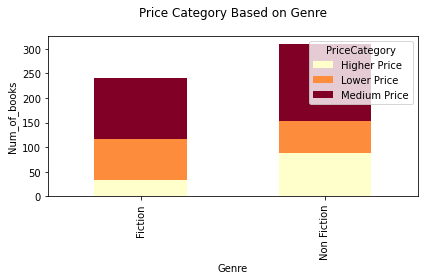

In [94]:
plt.figure(figsize=(10,5))
books.groupby(['Genre', 'PriceCategory'])['PriceCategory'].count().unstack().plot(kind='bar', stacked=True, cmap='YlOrRd')
plt.title('Price Category Based on Genre', pad=20)
plt.xlabel('Genre')
plt.ylabel('Num_of_books')
plt.tight_layout()
plt.show()

The books with higher PriceCategory are mostly for Non Fiction and lower PriceCategory is higher for Fiction.

<Figure size 720x360 with 0 Axes>

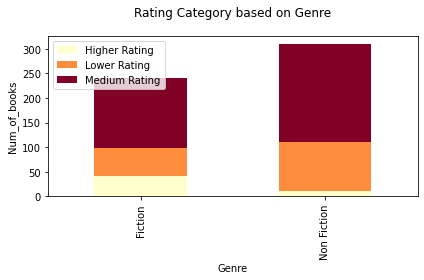

In [96]:
plt.figure(figsize=(10,5))
books.groupby(['Genre', 'RatingCategory'])['RatingCategory'].count().unstack().plot(kind='bar', stacked=True, cmap='YlOrRd')
plt.title('Rating Category based on Genre', pad=20)
plt.xlabel('Genre')
plt.ylabel('Num_of_books')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 720x360 with 0 Axes>

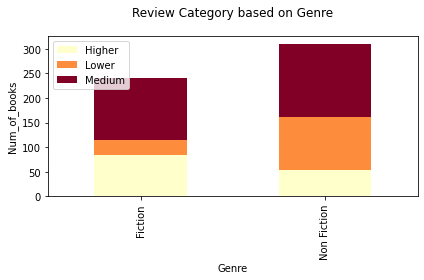

In [92]:
plt.figure(figsize=(10,5))
books.groupby(['Genre', 'ReviewCategory'])['ReviewCategory'].count().unstack().plot(kind='bar', stacked=True, cmap='YlOrRd')
plt.title('Review Category based on Genre', pad=20)
plt.xlabel('Genre')
plt.ylabel('Num_of_books')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Higher Rating Category are those > 4.8.
Lower rating were given more to NonFiction Books, while the reviews written are less than Fiction.
In summary, people who buy Fiction write more reviews with average rating better than NonFiction

📈**Top 10 Author in Bestselling List**📉

In [173]:
books['Author'].value_counts().head(10)

Jeff Kinney                           12
Rick Riordan                          11
Gary Chapman                          11
Suzanne Collins                       11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              9
Rob Elliott                            8
Bill O'Reilly                          7
Stephen R. Covey                       7
Name: Author, dtype: int64

📈**Top 10 Books in Bestselling List**📉

In [172]:
books['Name'].value_counts().head(10)

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
Wonder                                                                                5
The Five Dysfunctions of a Team: A Leadership Fable                                   5
How to Win Friends & Influence People                                                 5
Name: Name, dtype: int64